Autor : Ana Paula Vanderley

Data: 01/04/2023


# REGRESSÃO LINEAR

---





*  A Regressão Linear  é modelo mais simples de regressão .



*   Nela, utilizamos apenas uma variável explicativa que é a variavel independente (X) e uma variável resposta que é a variável dependente (Y).

*  Esse tipo de regressão é utilizado quando temos uma variável explicativa  e com base nessa variável tentamos prever os valores da variável dependente (Y).
Quando temos mais de uma variável explicativa , chamamos de Regressão Linear Múltipla.




O problema tratado nesse Exemplo é uma simulação da  previsão do ALTURA dos individuos (Variável Independente)  em relação ao seu PESO (Variável Dependente).



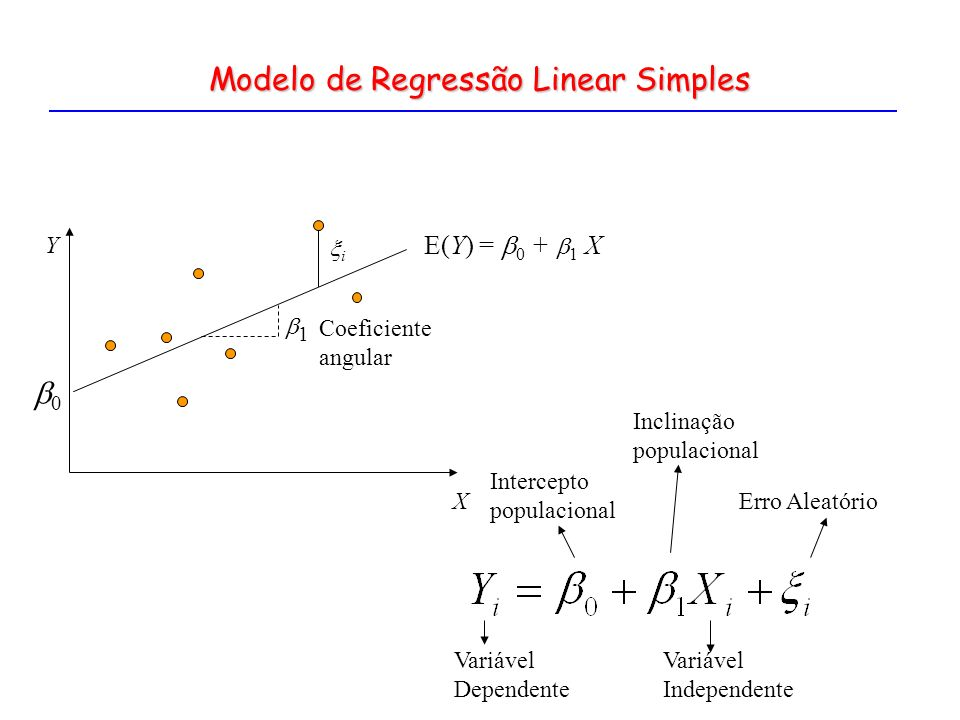

# IMPORTANDO BIBLIOTECAS E CARREGANDO BANCO DE DADOS

---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

*  Pandas é uma biblioteca de software criada para a linguagem Python para
manipulação e análise de dados.

*  A  biblioteca matplotlib para criação de gráficos e visualização de dados.

*  A Scikit-Learn é uma biblioteca Python para trabalhar com Machine Learning .





#BANCO DE DADOS

---



Aqui foi feita uma função que gera números aleatórios e criar as variáveis que iremos usar como exemplo para usar o modelo de regressão linear.

In [12]:
import numpy as np

def gera_dados(n):

    idade_float = np.random.normal(40, 10, n)  # média de 40 anos e desvio padrão de 10 anos
    idade = np.round(np.clip(idade_float, 18, 80)).astype(int)


    peso = 50 + 0.3 * idade + np.random.normal(0, 5, n)  # relação peso-idade

    altura = 1.6 + 0.01 * idade + np.random.normal(0, 0.1, n)  # relação altura-idade

    imc = peso / altura**2

    sexo = np.random.randint(0, 2, n)  # Distribuição aleatória de sexo

    atividade_fisica = np.random.randint(0, 3, n)

    habitos_alimentares = np.random.randint(0, 3, n)

    return idade, peso, altura, imc, sexo, atividade_fisica, habitos_alimentares


Podemos visualizar o banco de dados carregado digitando somente  o nome do banco de dados , ou se seu banco de dados for muito grade podemos usar a função ***head*** para expecificar a quantidade de linhas que você quer visualizar .

 Ex: **dados.haed(10)** esse comando retornará apenas 10 linhas do seu dataframe.

In [13]:
idade, peso, altura, imc, sexo, atividade_fisica, habitos_alimentares = gera_dados(5000) #gerando amostra de 5.000

dados = pd.DataFrame({'Idade': idade, 'Peso': peso , 'Altura': altura , 'IMC': imc , 'Sexo': sexo , 'Atv_fisica': atividade_fisica , 'Alimentacao': habitos_alimentares })
dados.head(10)

,Idade,Peso,Altura,IMC,Sexo,Atv_fisica,Alimentacao
0,49,58.615020,2.043585,14.035356,1,0,0
1,40,69.402014,2.012145,17.141679,1,0,1
2,43,60.718700,2.052760,14.409407,1,1,0
3,52,64.271767,2.024109,15.687450,0,1,1
4,41,69.220578,2.207253,14.207941,1,2,1
5,28,66.706621,1.806210,20.447135,1,1,1
6,34,66.980292,2.114786,14.976639,1,0,1
7,50,70.163564,2.055604,16.604769,1,0,0
8,57,68.682031,2.234922,13.750491,0,2,1
9,23,65.274399,1.801013,20.123756,0,1,2


MEDIDAS DESCRITIVAS

---
 podemos ver que  a média da idade é 40 , desvio padrão 10 , idade minima 18 e idade máxima 80 conforme as especificações que colocamos acima na hora de gerar as amostras para o modelo.


In [14]:
dados.describe()

,Idade,Peso,Altura,IMC,Sexo,Atv_fisica,Alimentacao
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.056000,62.105088,2.000424,15.688065,0.487800,1.002000,1.015600
std,9.991158,5.813752,0.144425,2.242503,0.499901,0.814941,0.816511
min,18.000000,39.835699,1.440991,9.913347,0.000000,0.000000,0.000000
25%,33.000000,58.209363,1.900928,14.104567,0.000000,0.000000,0.000000
50%,40.000000,62.136398,1.997346,15.509925,0.000000,1.000000,1.000000
75%,47.000000,66.074756,2.100377,17.067705,1.000000,2.000000,2.000000
max,80.000000,81.504166,2.608563,26.807528,1.000000,2.000000,2.000000


CORRELAÇÃO

---



In [15]:
dados.corr()

,Idade,Peso,Altura,IMC,Sexo,Atv_fisica,Alimentacao
Idade,1.000000,0.521149,0.719656,-0.390230,-0.006752,-0.002053,0.000996
Peso,0.521149,1.000000,0.370745,0.282623,0.013005,-0.001650,-0.003654
Altura,0.719656,0.370745,1.000000,-0.776821,-0.026289,0.003008,-0.019640
IMC,-0.390230,0.282623,-0.776821,1.000000,0.033210,-0.008418,0.016565
Sexo,-0.006752,0.013005,-0.026289,0.033210,1.000000,0.011354,-0.003944
Atv_fisica,-0.002053,-0.001650,0.003008,-0.008418,0.011354,1.000000,-0.015078
Alimentacao,0.000996,-0.003654,-0.019640,0.016565,-0.003944,-0.015078,1.000000


In [16]:
corr_matrix = dados.corr()

corr_y = corr_matrix['Peso'].loc[corr_matrix['Peso'] > 0]
corr_orden = corr_y.sort_values(ascending=False)


print(corr_orden)

Peso      1.000000
Idade     0.521149
Altura    0.370745
IMC       0.282623
Sexo      0.013005
Name: Peso, dtype: float64


* A variável PESO apresentou uma corelação positiva maior com a variável idade, seguida de altura e depois imc.

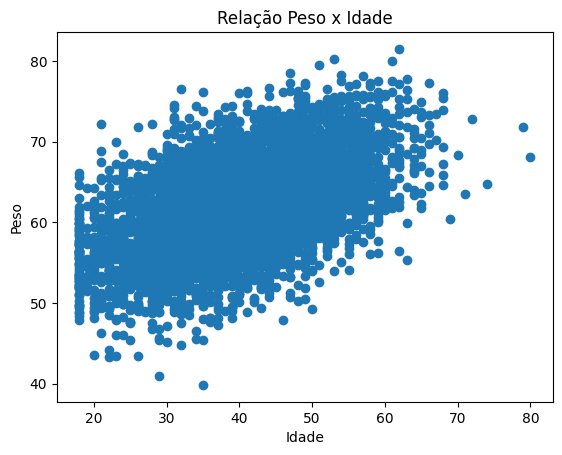

In [48]:
# Plotar os dados
plt.scatter(dados['Idade'], dados['Peso'])
plt.title('Relação Peso x Idade')
plt.xlabel('Idade')
plt.ylabel('Peso')
plt.show()


VISUALIZAÇÃO

---



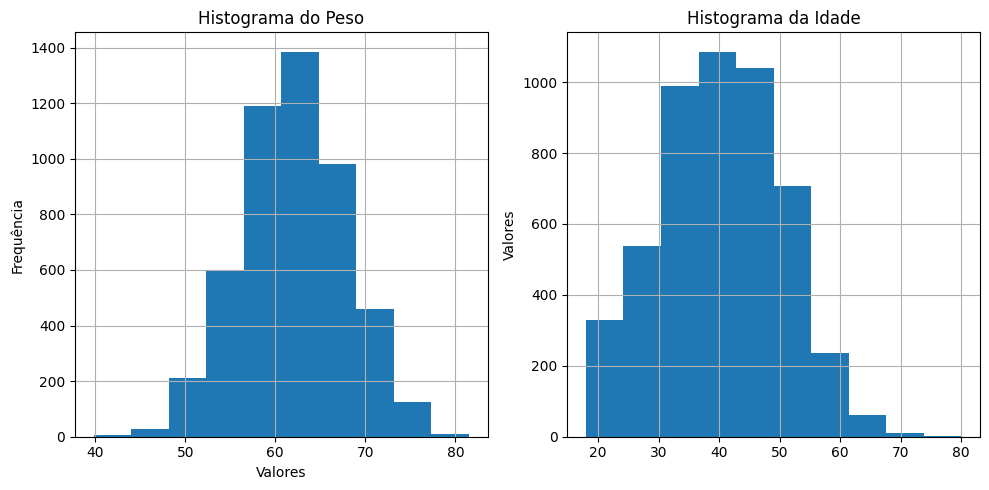

In [20]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
dados['Peso'].hist()
plt.title('Histograma do Peso')
plt.xlabel('Valores')
plt.ylabel('Frequência')


plt.subplot(1, 2, 2)
dados['Idade'].hist()
plt.title('Histograma da Idade')
plt.ylabel('Valores')

plt.tight_layout()
plt.show()

VALORES NULOS

---



In [21]:
nulos = dados.isnull().sum()
nulos

Idade          0
Peso           0
Altura         0
IMC            0
Sexo           0
Atv_fisica     0
Alimentacao    0
dtype: int64

# **VARIAVEL DEPENDENTE**

---



*   variável dependente (Y) que é a variável que queremos prever  nesse caso o PESO.

*  A variável independente nesse caso é a coluna IDADE pois é através dos valores dessa variável que tentaremos prever os valores da variável dependente que é o PESO.

In [22]:
X = dados[['Idade']]  # variável independente
y = dados[['Peso']]   # variável dependente

# TREINAMENTO E AJUSTE DO MODELO

---



In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

*  Acima chamamos a funções ***train_test_split*** que divide os dados em treino e test e o modelo de regressão linear da biblioteca sklearn.

# **SEPARANDO DADOS DE TREINO E DE TESTE**

---
*  A seguir separamos os dados de treino e de teste 70% para treino e 30% para teste. Essa separação serve para que o modelo treine com os dados indicados antes de testar suas previsões e os resultados sejam mais confiavéis.


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **TREINANDO O MODELO**

---

*  A função ***LinearRegression*** chama a regressão linaar e a função ***fit*** treina o modelo.

In [25]:
regr = LinearRegression()

In [26]:
regr.fit(X_train, y_train)

LinearRegression()

*  O Coeficiente mede a inclinação da reta ele indica o valor esperado de Y (Variável Dependente) para cada mudança no valor de X (Variável Independente).
*  O Intercepto indica o ponto em que a reta corta o eixo Y , é o valor esperado de Y quando X é igual a zero.


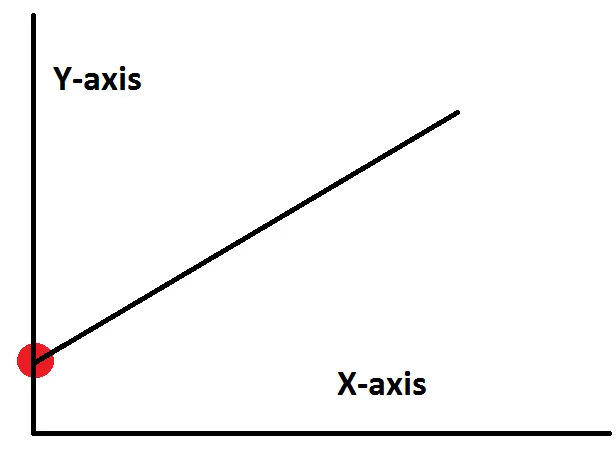

In [27]:
coef_angular = regr.coef_[0]
coef_linear = regr.intercept_
print('Coeficiente Angular:', coef_angular)
print('Coeficiente Linear:', coef_linear)

Coeficiente Angular: [0.30055411]
Coeficiente Linear: [50.08779581]


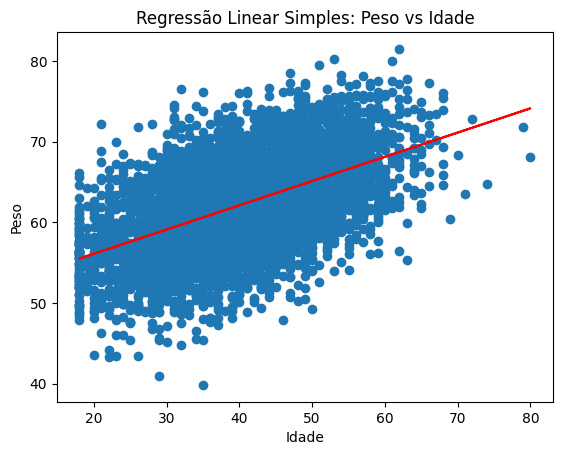

In [29]:
plt.scatter(dados['Idade'], dados['Peso'])
plt.plot(dados['Idade'], regr.predict(X), color='red')
plt.title('Regressão Linear Simples: Peso vs Idade')
plt.xlabel('Idade')
plt.ylabel('Peso')
plt.show()

# **PREVENDO VALORES A PARTIR DOS DADOS DE TESTE**

---



In [30]:
y_pred = regr.predict(X_test)
y_pred

array([[62.71106836],
       [63.01162247],
       [63.91328479],
       ...,
       [62.10996014],
       [56.69998619],
       [62.41051425]])

A função ***predict()*** retorna uma matriz de previsões para cada instância de dados no conjunto de testes. Podemos então, imprimir nossas previsões para ter uma ideia do que o modelo determinou.

Os dados de teste serão apresentados ao modelo após a sua criação, simulando previsões reais que o modelo realizará, permitindo assim que o desempenho real seja verificado. Estes dados costumam representar cerca de 30% da totalidade dos dados.

*  Distribuição dos valores previstos pelo modelo.

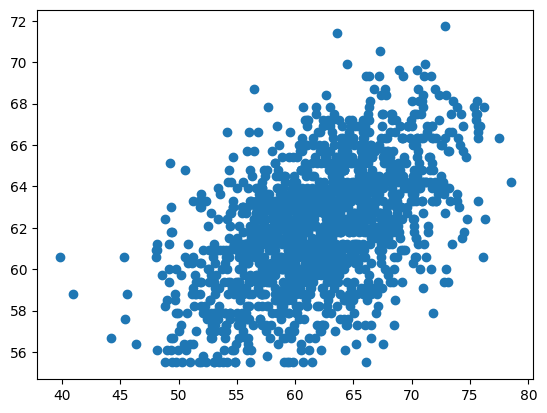

In [31]:
plt.scatter(y_test, y_pred)

# RESULTADOS DO MODELO

---
 A função ***metrics*** da biblioteca ***Scikit-learn***, é usada para avaliar o desempenho de modelos de aprendizado de máquina.


In [32]:
from sklearn import metrics

*  O modelo de Regressão Linear é formado pelo intercepto como já vimos que é o ponto em que a reta toca o eixo Y , o coeficiente angular que mede a inclinação da reta , a variável explicativa e o erro .

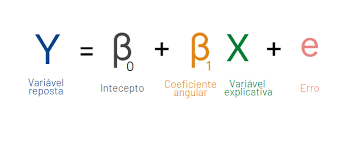

*  O erro médio absoluto retorna um valor que representa o erro  entre as previsões que o modelo fez  e os valores reais do conjunto de teste. Quanto menor for esse erro melhor será o desempenho do modelo.

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = regr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Mean Absolute Error (MAE): 3.9324068883033396
Mean Squared Error (MSE): 24.599746263789616
R-squared (R²): 0.2747199972931007


*  O modelo consegue esplicar a variabilidade dos dados em cerca de 27,47% , sua média de erro absoluta é de 3.93 , ou seja , em suas previsões a média de erro entre o valor real e o valor previsto está em torno de 2 unidades.

RESIDUOS DO MODELO

---
*  Podemos visualizar que os residuos do modelo seguem uma distribuição normal o que nos indica que o modelo está conseguindo capturar bem a variabilidade dos dados e os presupostos do nodelo de regressão linear estão sendo atendidas.


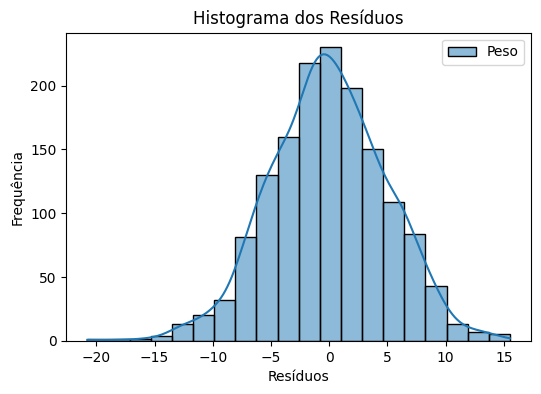

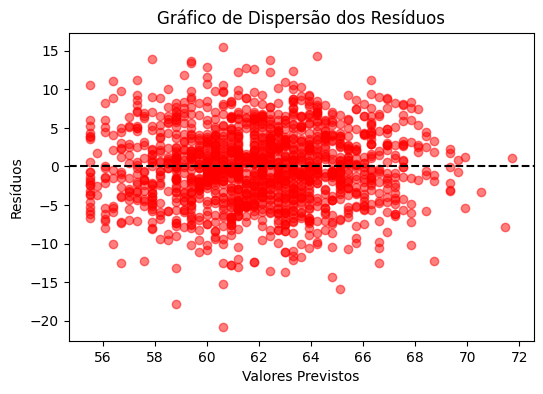

In [43]:
import seaborn as sns

# Calculando os resíduos
residuos = y_test - y_pred


plt.figure(figsize=(6, 4))
sns.histplot(residuos, bins=20, kde=True, color='blue')
plt.title('Histograma dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()


plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuos, color='red', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Gráfico de Dispersão dos Resíduos')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.show()



*  Podemos visualizar a normalidade dos resíduos verificando o  gráfico Q-Q (quantile-quantile) plot ele compara os quantis observados dos resíduos com os quantis teóricos de uma distribuição normal.

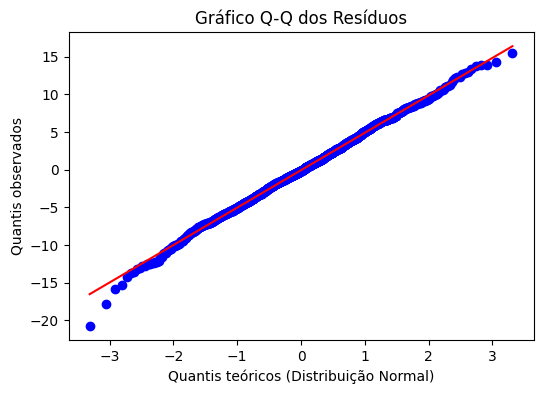

In [47]:
import scipy.stats as stats

# Calculando os resíduos
residuos = np.array(y_test - y_pred)

plt.figure(figsize=(6, 4))
stats.probplot(residuos.flatten(), dist="norm", plot=plt)
plt.title('Gráfico Q-Q dos Resíduos')
plt.xlabel('Quantis teóricos (Distribuição Normal)')
plt.ylabel('Quantis observados')
plt.show()
